# New Section

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam',
                    alpha=0.0001, batch_size='auto', learning_rate='constant',
                    learning_rate_init=0.001, max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

In [4]:

path="/content/gdrive/MyDrive/NLP/Emotions/"
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import os
from sklearn.model_selection import train_test_split
audio_path = []
audio_emotion = []
directory_path = os.listdir(path)
print(directory_path)

['1079_TAI_ANG_XX.wav', '1079_IEO_SAD_LO.wav', '1079_IWL_ANG_XX.wav', '1079_IEO_ANG_HI.wav', '1080_DFA_ANG_XX.wav', '1079_MTI_NEU_XX.wav', '1079_ITH_HAP_XX.wav', '1079_IWL_SAD_XX.wav', '1079_IEO_HAP_HI.wav', '1079_IWL_FEA_XX.wav', '1079_TAI_DIS_XX.wav', '1079_MTI_HAP_XX.wav', '1080_IEO_SAD_HI.wav', '1079_ITS_FEA_XX.wav', '1079_MTI_SAD_XX.wav', '1079_DFA_SAD_XX.wav', '1079_IWW_DIS_XX.wav', '1079_ITH_DIS_XX.wav', '1079_IEO_ANG_LO.wav', '1079_IEO_NEU_XX.wav', '1080_IOM_ANG_XX.wav', '1079_WSI_DIS_XX.wav', '1079_IEO_FEA_MD.wav', '1078_TSI_SAD_XX.wav', '1080_IEO_ANG_HI.wav', '1079_IEO_HAP_LO.wav', '1079_ITS_HAP_XX.wav', '1078_WSI_DIS_XX.wav', '1080_DFA_FEA_XX.wav', '1079_IWW_ANG_XX.wav', '1078_WSI_FEA_XX.wav', '1078_TSI_FEA_XX.wav', '1079_IWW_HAP_XX.wav', '1078_WSI_SAD_XX.wav', '1079_IOM_DIS_XX.wav', '1079_IWW_SAD_XX.wav', '1079_MTI_DIS_XX.wav', '1079_IWL_DIS_XX.wav', '1078_WSI_ANG_XX.wav', '1079_ITS_NEU_XX.wav', '1079_IEO_SAD_HI.wav', '1079_IEO_FEA_HI.wav', '1080_IEO_FEA_LO.wav', '1079_MTI_

In [12]:
audio_path = []
audio_emotion = []
directory_path = os.listdir(path)
print(directory_path)
for audio in directory_path:
    audio_path.append(path + audio)
    emotion = audio.split('_')
    if emotion[2] == 'SAD':
        audio_emotion.append("sad")
    elif emotion[2] == 'ANG':
        audio_emotion.append("angry")
    elif emotion[2] == 'DIS':
        audio_emotion.append("disgust")
    elif emotion[2] == 'NEU':
        audio_emotion.append("neutral")
    elif emotion[2] == 'HAP':
        audio_emotion.append("happy")
    elif emotion[2] == 'FEA':
        audio_emotion.append("fear")
    else:
        audio_emotion.append("unknown")
print(audio_path)
print(audio_emotion)
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
print(dataset)


['1079_TAI_ANG_XX.wav', '1079_IEO_SAD_LO.wav', '1079_IWL_ANG_XX.wav', '1079_IEO_ANG_HI.wav', '1080_DFA_ANG_XX.wav', '1079_MTI_NEU_XX.wav', '1079_ITH_HAP_XX.wav', '1079_IWL_SAD_XX.wav', '1079_IEO_HAP_HI.wav', '1079_IWL_FEA_XX.wav', '1079_TAI_DIS_XX.wav', '1079_MTI_HAP_XX.wav', '1080_IEO_SAD_HI.wav', '1079_ITS_FEA_XX.wav', '1079_MTI_SAD_XX.wav', '1079_DFA_SAD_XX.wav', '1079_IWW_DIS_XX.wav', '1079_ITH_DIS_XX.wav', '1079_IEO_ANG_LO.wav', '1079_IEO_NEU_XX.wav', '1080_IOM_ANG_XX.wav', '1079_WSI_DIS_XX.wav', '1079_IEO_FEA_MD.wav', '1078_TSI_SAD_XX.wav', '1080_IEO_ANG_HI.wav', '1079_IEO_HAP_LO.wav', '1079_ITS_HAP_XX.wav', '1078_WSI_DIS_XX.wav', '1080_DFA_FEA_XX.wav', '1079_IWW_ANG_XX.wav', '1078_WSI_FEA_XX.wav', '1078_TSI_FEA_XX.wav', '1079_IWW_HAP_XX.wav', '1078_WSI_SAD_XX.wav', '1079_IOM_DIS_XX.wav', '1079_IWW_SAD_XX.wav', '1079_MTI_DIS_XX.wav', '1079_IWL_DIS_XX.wav', '1078_WSI_ANG_XX.wav', '1079_ITS_NEU_XX.wav', '1079_IEO_SAD_HI.wav', '1079_IEO_FEA_HI.wav', '1080_IEO_FEA_LO.wav', '1079_MTI_

In [6]:

def extract_mfcc_fixed_duration(audio_path, duration=10, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)

    target_length = int(duration * sr)
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)))
    else:
        y = y[:target_length]

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.flatten()


In [7]:
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
print(dataset.head())


     Emotions
0       angry
1         sad
2       angry
3       angry
4       angry
...       ...
7437     fear
7438    happy
7439  disgust
7440  neutral
7441    happy

[7442 rows x 1 columns]
                                                   Path
0     /content/gdrive/MyDrive/NLP/Emotions/1079_TAI_...
1     /content/gdrive/MyDrive/NLP/Emotions/1079_IEO_...
2     /content/gdrive/MyDrive/NLP/Emotions/1079_IWL_...
3     /content/gdrive/MyDrive/NLP/Emotions/1079_IEO_...
4     /content/gdrive/MyDrive/NLP/Emotions/1080_DFA_...
...                                                 ...
7437  /content/gdrive/MyDrive/NLP/Emotions/1006_MTI_...
7438  /content/gdrive/MyDrive/NLP/Emotions/1006_IEO_...
7439  /content/gdrive/MyDrive/NLP/Emotions/1006_IOM_...
7440  /content/gdrive/MyDrive/NLP/Emotions/1006_IEO_...
7441  /content/gdrive/MyDrive/NLP/Emotions/1006_ITS_...

[7442 rows x 1 columns]
                                                Path Emotions
0  /content/gdrive/MyDrive/NLP/Emotions/1079_TAI

In [8]:


for index, row in dataset.iterrows():
    file_path = row['Path']
    label = row['Emotions']

    mfcc_features = extract_mfcc_fixed_duration(file_path, n_mfcc=13)

    features.append(mfcc_features)
    labels.append(label)



In [ ]:
print(labels[0])
print(features[0])

angry
[-436.45517 -429.68097 -435.19736 ...    0.         0.         0.     ]


In [9]:

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)


In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(n_estimators=200, random_state=56)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.4228187919463087
Classification Report:
               precision    recall  f1-score   support

       angry       0.58      0.69      0.63       131
     disgust       0.39      0.30      0.34       129
        fear       0.32      0.10      0.15       131
       happy       0.37      0.42      0.39       124
     neutral       0.32      0.45      0.37       104
         sad       0.46      0.59      0.52       126

    accuracy                           0.42       745
   macro avg       0.41      0.42      0.40       745
weighted avg       0.41      0.42      0.40       745



In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)



In [ ]:
pip install --upgrade librosa

In [ ]:
import librosa
from librosa.effects import time_stretch

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [ ]:
sample_rate=22400
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
   # new_data = stretch(data)
    #data_stretch_pitch = pitch(data, sample_rate, pitch_factor=0.7)
    res3 = extract_features(data)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(dataset.Path, dataset.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), dataset.Path.shape

(22326, 22326, (7442,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.093201,0.550443,0.622619,0.490897,0.446235,0.497374,0.474409,0.501346,0.612083,0.668273,...,1.295158e-06,1.232708e-06,1.187051e-06,1.154076e-06,1.130605e-06,1.113321e-06,1.101978e-06,1.094051e-06,1.090262e-06,angry
1,0.300489,0.670246,0.740260,0.801054,0.701777,0.704089,0.720199,0.612248,0.620221,0.703893,...,2.028522e-02,2.018844e-02,2.132572e-02,1.961866e-02,1.972533e-02,2.063746e-02,2.088084e-02,2.142127e-02,2.055402e-02,angry
2,0.093201,0.550443,0.622619,0.490897,0.446235,0.497374,0.474409,0.501346,0.612083,0.668273,...,1.295158e-06,1.232708e-06,1.187051e-06,1.154076e-06,1.130605e-06,1.113321e-06,1.101978e-06,1.094051e-06,1.090262e-06,angry
3,0.040695,0.584529,0.585873,0.532556,0.513211,0.527414,0.658149,0.699411,0.645604,0.657683,...,3.798660e-09,3.515377e-09,3.310705e-09,3.161694e-09,3.053251e-09,2.972488e-09,2.916624e-09,2.877725e-09,2.856908e-09,sad
4,0.104103,0.680294,0.681686,0.648520,0.643697,0.672567,0.756940,0.730012,0.663185,0.676696,...,1.446523e-04,1.434892e-04,1.338081e-04,1.375949e-04,1.414030e-04,1.470144e-04,1.409066e-04,1.354304e-04,1.382968e-04,sad


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162), (16744, 6), (5582, 162), (5582, 6))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162), (16744, 6), (5582, 162), (5582, 6))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162, 1), (16744, 6), (5582, 162, 1), (5582, 6))

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 162, 256)          1536      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 81, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_19 (Conv1D)          (None, 81, 256)           327936    
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 41, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_20 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 21, 128)          

In [ ]:
from keras.callbacks import ReduceLROnPlateau

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])


Epoch 1/50
262/262 [==============================] - 132s 482ms/step - loss: 1.6023 - accuracy: 0.3126 - val_loss: 1.4859 - val_accuracy: 0.3848 - lr: 0.0010
Epoch 2/50
262/262 [==============================] - 120s 457ms/step - loss: 1.5110 - accuracy: 0.3604 - val_loss: 1.4294 - val_accuracy: 0.3979 - lr: 0.0010
Epoch 3/50
262/262 [==============================] - 113s 434ms/step - loss: 1.4687 - accuracy: 0.3896 - val_loss: 1.4044 - val_accuracy: 0.4274 - lr: 0.0010
Epoch 4/50
262/262 [==============================] - 115s 439ms/step - loss: 1.4392 - accuracy: 0.4057 - val_loss: 1.4072 - val_accuracy: 0.4262 - lr: 0.0010
Epoch 5/50
262/262 [==============================] - 120s 457ms/step - loss: 1.4001 - accuracy: 0.4278 - val_loss: 1.3543 - val_accuracy: 0.4393 - lr: 0.0010
Epoch 6/50
262/262 [==============================] - 128s 489ms/step - loss: 1.3750 - accuracy: 0.4397 - val_loss: 1.3323 - val_accuracy: 0.4643 - lr: 0.0010
Epoch 7/50
262/262 [==========================

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

175/175 [==============================] - 10s 58ms/step - loss: 1.0428 - accuracy: 0.7173
Accuracy of our model on test data :  71.7305600643158 %


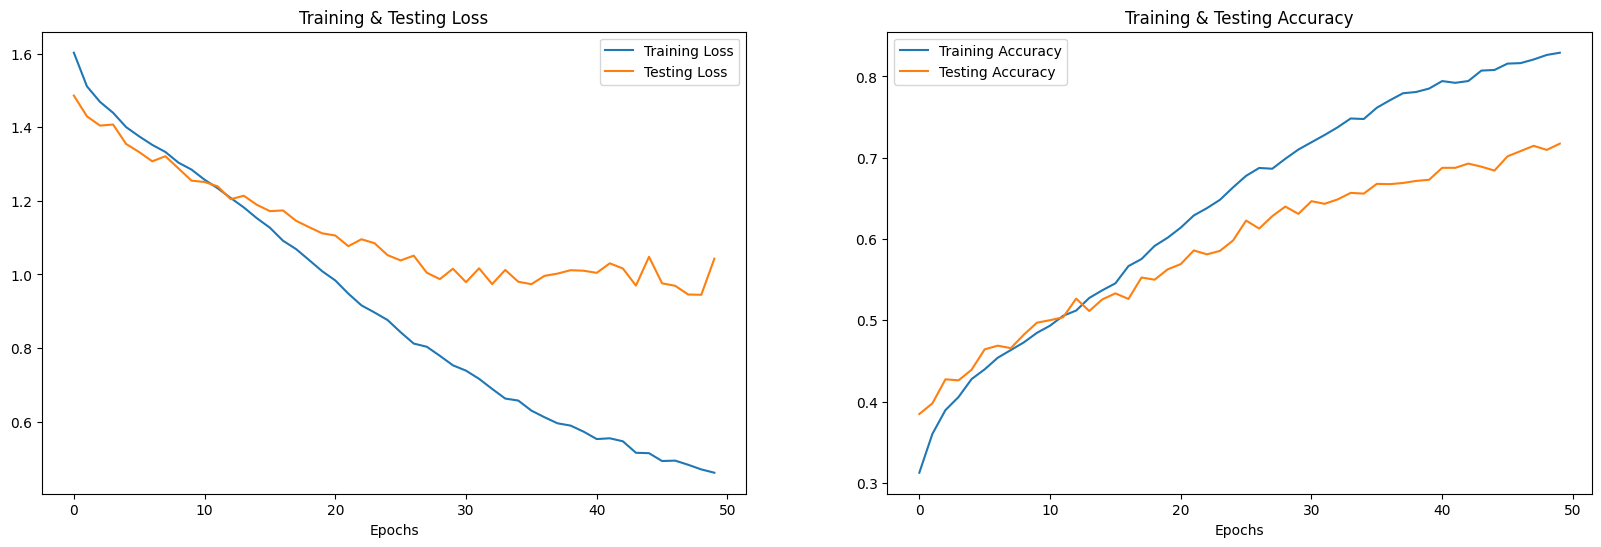

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

175/175 [==============================] - 8s 45ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fear,fear
1,happy,happy
2,angry,angry
3,neutral,neutral
4,fear,fear
5,angry,angry
6,disgust,neutral
7,sad,sad
8,disgust,sad
9,sad,sad


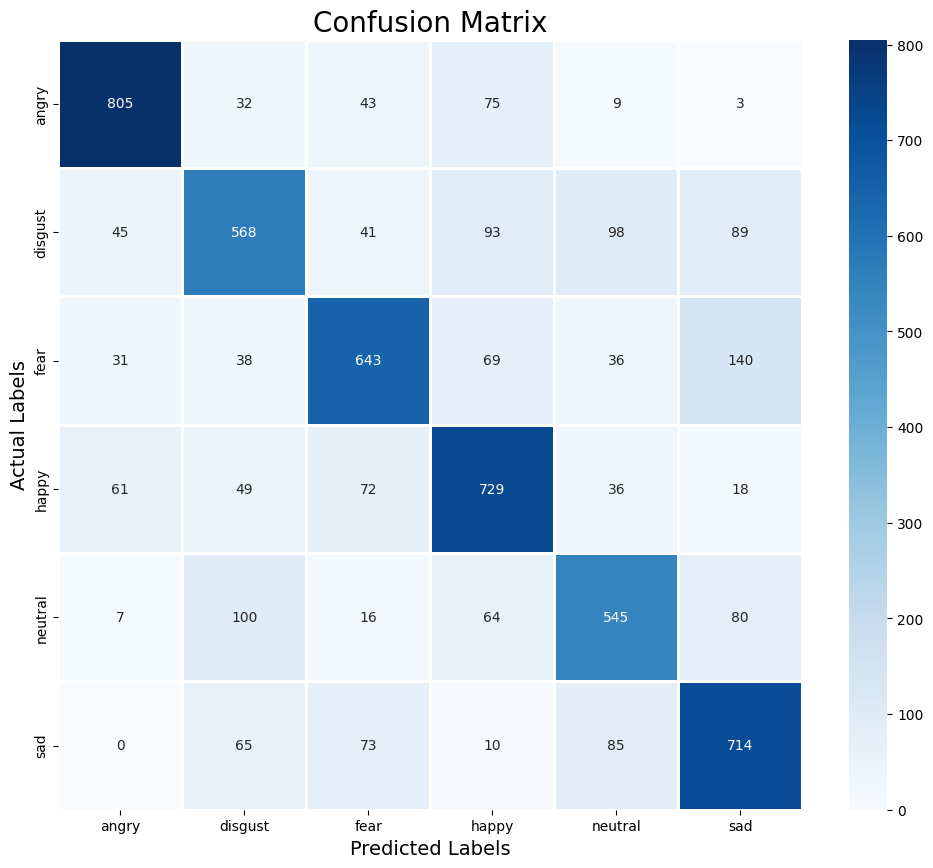

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.85      0.83      0.84       967
     disgust       0.67      0.61      0.64       934
        fear       0.72      0.67      0.70       957
       happy       0.70      0.76      0.73       965
     neutral       0.67      0.67      0.67       812
         sad       0.68      0.75      0.72       947

    accuracy                           0.72      5582
   macro avg       0.72      0.72      0.72      5582
weighted avg       0.72      0.72      0.72      5582



In [ ]:
# Augmentation (Noise Injection)
noise_amp = 0.035*np.random.uniform()*np.amax(data)
audio_injected_data = data + noise_amp*np.random.normal(size=data.shape[0])
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()
noise_amp = 0.035*np.random.uniform()*np.amax(data1)
audio_injected_data = data1 + noise_amp*np.random.normal(size=data1.shape[0])
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing ANGRY emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()
noise_amp = 0.035*np.random.uniform()*np.amax(data2)
audio_injected_data = data2 + noise_amp*np.random.normal(size=data2.shape[0])
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing ANGRY emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()

In [ ]:
extracted_audio_df = pd.DataFrame(X)
extracted_audio_df["emotion_of_audio"] = Y
#print(extracted_audio_df)
print(extracted_audio_df.shape)
print(extracted_audio_df.tail(10))
extracted_audio_df = extracted_audio_df.fillna(0)
print(extracted_audio_df.isna().any())
print(extracted_audio_df.tail(10))

(7442, 30457)
               0          1          2          3          4          5  \
7432 -688.636532 -32.518180 -22.972870  18.378122  13.940141   0.235408   
7433 -804.046308   6.338210 -15.037096  14.288765  -2.498343   6.319306   
7434 -589.462003 -72.330571  -8.174482   4.418981   6.366305   3.919580   
7435 -712.371895 -34.693028   0.501392  16.909067   9.442829  -1.140252   
7436 -693.694118 -52.474721 -23.696277  24.669074  13.395870  -9.044543   
7437 -716.917368 -51.427870   7.139748  22.707305  17.386441  -0.894065   
7438 -689.775472 -56.462601  -4.318506  26.741105  21.691102 -15.217307   
7439 -695.929620 -47.690436   1.450814  26.213979  12.486727 -16.118770   
7440 -765.618293  -6.412516 -12.065482   6.755822   3.590201  -5.955103   
7441 -623.599693 -58.891124 -13.109406  21.587279  12.805530  -1.631025   

              6          7          8          9  ...  30447  30448  30449  \
7432 -21.600863   1.327439 -15.234195   4.558386  ...    NaN    NaN    NaN   
7433